
This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the Lab sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 

* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.

* Do the extra credit problems last. This can help you increase your scores

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [2]:
# Load you data the Boston Housing data into a dataframe
# MEDV.txt containt the median house values and data.txt the other 13 features
# in order ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
# Your code here

data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')
col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT']
df = pd.DataFrame(data, columns = col)
df['MEDV'] = target

In [3]:
print(df.head())
print(df.isnull().sum())
df.dtypes

       CRIM    ZN     INDUS  CHAS       NOX        RM   AGE       DIS  RAD  \
0  0.218960  18.0  2.629288   0.0  0.869420  6.875396  65.2  4.347275  1.0   
1  0.141576   0.0  7.315612   0.0  0.549711  6.499894  78.9  5.315684  2.0   
2  0.380457   0.0  7.340354   0.0  0.697928  7.263489  61.1  5.356935  2.0   
3  0.313563   0.0  2.562407   0.0  0.599629  7.209732  45.8  6.103983  3.0   
4  0.330105   0.0  2.497337   0.0  0.476077  7.184111  54.2  6.264372  3.0   

     TAX    PTRATIO           B     LSTAT  MEDV  
0  307.0  15.534711  397.462329  5.715647  24.0  
1  255.0  17.914131  397.012611  9.338417  21.6  
2  243.0  17.919989  396.628236  4.142473  34.7  
3  226.0  18.979527  398.564784  3.239272  33.4  
4  234.0  18.708888  399.487766  6.115159  36.2  
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between median housing price and number of rooms per house. Do the following:

(a) Regress the housing price on the number of rooms per house. Draw a scatter plot of housing price (y-axis) against rooms (x-axis), and draw the regression line in blue.  You might want to make the dots semi-transparent if it improves the presentation of the figure. 

(b) Regress the housing price on the number of rooms per house and the (number of rooms per house) squared.  Show the (curved) regression line in green. 

(c) Interpret your results.

Coef_:  [[8.95992721]]
Intercept_:  [-35.57620687]


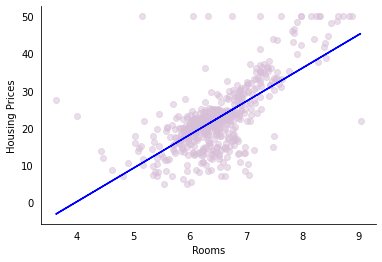

In [4]:
# (a) Regress the housing price on the number of rooms per house. Draw a scatter plot of housing price (y-axis) 
# against rooms (x-axis), and draw the regression line in blue. 
# You might want to make the dots semi-transparent if it improves the presentation of the figure.

# setting up the model
X1 = np.array(df[['RM']])
y1 = np.array(df[['MEDV']])
model1 = sklearn.linear_model.LinearRegression()
model1.fit(X1, y1)
print("Coef_: ",model1.coef_)
print("Intercept_: ",model1.intercept_)

# plotting the line
plt.scatter(X1, y1,color='thistle', alpha=0.5)
plt.plot(X1, model1.predict(X1),color='b')
plt.xlabel('Rooms')
plt.ylabel('Housing Prices')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

Coef_:  [[-23.78960283   2.46914488]]
Intercept_:  [71.73632811]


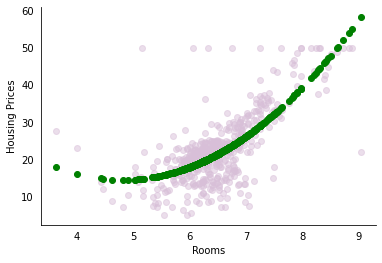

In [6]:
# (b) Regress the housing price on the number of rooms per house and the 
# (number of rooms per house) squared. Show the (curved) regression line in green.

# setting up the model
y = np.array(df[['MEDV']])
X = np.array(df[['RM']])
X2 = X**2
x = np.hstack((X,X2))
model2 = LinearRegression().fit(x, y)
model2.score(x, y)
print("Coef_: ",model2.coef_)
print("Intercept_: ",model2.intercept_)

# plotting the curve
plt.scatter(df['RM'], y,color='thistle', alpha=0.5)
plt.scatter(df['RM'], model2.predict(x),color='g')
plt.xlabel('Rooms')
plt.ylabel('Housing Prices')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.show()

c) Interpret your results.

Part a tells us that for every one unit increase in room number, the median home price value increases by $89,599. The line appears to be doing a fairly good job of predicting the data.
Part b, however, appears to be doing a better job of fitting the data. This suggests that more complex models could be worth exploring.


### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 5-fold cross-validation to fit the regression model (a) from 1.1, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Create a new scatterplot of housing price against rooms, and draw the five different regression lines in light blue, and the oroginal regression line from 1.1 in red (which was estimated using the full dataset). What do you notice?

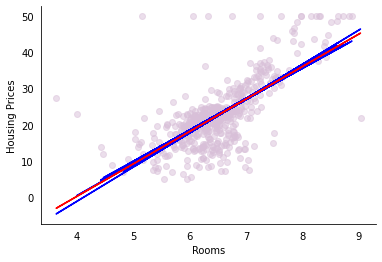

In [7]:
from sklearn.model_selection import KFold

#setting up the model
X = df['RM']
y = df['MEDV']

model2 = sklearn.linear_model.LinearRegression()

# cross validation
kf = KFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X):
    #print(train_index, test_index)
    X_train , X_test = np.array(X.iloc[train_index]),np.array(X.iloc[test_index])
    y_train , y_test = y[train_index] , y[test_index]
    model2.fit(X_train.reshape(-1, 1),y_train)
    plt.plot(X_test, model2.predict(np.array(X_test).reshape(-1,1)),color='b')

# plotting
plt.scatter(X1, y1,color='thistle', alpha=0.5)
plt.plot(X1, model1.predict(X1),color='r')
plt.xlabel('Rooms')
plt.ylabel('Housing Prices')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.show()

There are variations across all the cross validated lines, but they are all generally around the same. The line using all data appears to be around the center of the cross validated lines, however, it could be overfitted to the data.

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [8]:
import time
import random

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""



def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    # initialize the parameters
    start_time = time.time()
    xvalues = np.array(xvalues)
    yvalues = np.array(yvalues)
    alpha = random.random()
    beta = random.random()
    i = 0
    
    
    alphas = [np.inf, alpha]
    betas = [np.inf, beta]
    
    # gradient descent
    while i <= MaxIterations:
        if np.abs(alphas[-2] - alphas[-1]) > 0.0001 or np.abs(betas[-2] - betas[-1])>.0001:
            beta -= R*(2/len(xvalues))*np.sum((np.multiply(xvalues,beta)+alpha-yvalues)*xvalues)
            alpha -= R*(2/len(xvalues))*np.sum(np.multiply(xvalues,beta)+alpha-yvalues)
            alphas.append(alpha)
            betas.append(beta)
        else:
            break
        i += 1
    alpha = alphas[-1]
    beta = betas[-1]
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    print("Iteration number: " + str(i))
    return alpha, beta

# example function call
# print(bivariate_ols(X, Y, 0.01, 100000))


In [9]:
X = df[['RM']]
Y = df[['MEDV']]

# running function with R = .01
t,u = bivariate_ols(X, Y, 0.01, 100000)
print("Alpha: " + str(t))
print("Beta: " + str(u))

Time taken: 0.31 seconds
Iteration number: 19088
Alpha: -35.14701971606561
Beta: 8.894505588179126


In [10]:
# running function with R = .001
t,u = bivariate_ols(X, Y, 0.001, 100000)
print("Alpha: " + str(t))
print("Beta: " + str(u))

Time taken: 1.46 seconds
Iteration number: 92235
Alpha: -31.20692745328819
Beta: 8.293914758781714


In [11]:
# running function with R = .0001
t,u = bivariate_ols(X, Y, 0.0001, 100000)
print("Alpha: " + str(t))
print("Beta: " + str(u))

Time taken: 0.01 seconds
Iteration number: 663
Alpha: 0.6343864261889308
Beta: 3.4302155985777203


How do your coefficients compare to the ones estimated through standard libraries? Does this depend on R?

Using a standard library and all of the data, we found that beta was 8.96 and alpha was -35.58. Our alpha and beta values using learning rate .01 was very close to our standard library, but became continuously farther away from our standard library values as learning rate decreased.

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [12]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using TAX and RM as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [13]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    # initialize the parameters
    start_time = time.time()
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)
    alpha = random.random()
    N = len(yvalues)
    shape = np.shape(xvalue_matrix)
    beta_array = np.random.rand(shape[1],1)
    
    # gradient descent
    for i in range(MaxIterations):
        y_hat = np.dot(xvalue_matrix,beta_array) + alpha
        alpha_partial = np.sum(y_hat-yvalues)/N
        beta_partial = np.dot(xvalue_matrix.T,(y_hat-yvalues))/N
        new_alpha = alpha - (R*alpha_partial)
        new_beta = beta_array - (R*beta_partial)
        if abs(alpha - new_alpha) <= .0001 and max(abs(beta_array - new_beta)) <= .0001:
            print("Time taken: {:.2f} seconds".format(time.time() - start_time))
            print("Iteration number: " + str(i))
            return new_alpha, new_beta
        alpha = new_alpha
        beta_array = new_beta
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    print("Iteration number: " + str(i))
    return new_alpha, new_beta
    


In [14]:
Y = np.array(df[['MEDV']])
X = standardize(df[['RM','TAX']])


# running function with R = .01
t,u = multivariate_ols(X, Y, 0.01, 100000)
print("Alpha: " + str(t))
print("Beta: " + str(u))

Time taken: 0.01 seconds
Iteration number: 765
Alpha: 22.52290993255893
Beta: [[ 5.53559337]
 [-2.72407888]]


In [15]:
# running function with R = .001
t,u = multivariate_ols(X, Y, 0.001, 100000)
print("Alpha: " + str(t))
print("Beta: " + str(u))

Time taken: 0.07 seconds
Iteration number: 5377
Alpha: 22.43295256596492
Beta: [[ 5.51579539]
 [-2.73596294]]


In [16]:
# running function with R = .0001
t,u = multivariate_ols(X, Y, 0.0001, 100000)
print("Alpha: " + str(t))
print("Beta: " + str(u))

Time taken: 0.41 seconds
Iteration number: 31064
Alpha: 21.53296571687588
Beta: [[ 5.35611423]
 [-2.73567129]]


It appears that as R decreases, alpha decreases and our beta values decrease. Our running time and iteration count increase as R decreases. 

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [17]:
Y = np.array(df[['MEDV']])
X = (df[['RM','TAX']])
print(type(X))

# running function with R = .01
t,u = multivariate_ols(X, Y, 0.01, 100000)
print(t, u)

<class 'pandas.core.frame.DataFrame'>


<ipython-input-13-13b5787c16a3>:45: RuntimeWarning: invalid value encountered in subtract
  new_beta = beta_array - (R*beta_partial)


Time taken: 1.31 seconds
Iteration number: 99999
nan [[nan]
 [nan]]


In [18]:
# running function with R = .001
t,u = multivariate_ols(X, Y, 0.001, 100000)
print(t, u)

<ipython-input-13-13b5787c16a3>:45: RuntimeWarning: invalid value encountered in subtract
  new_beta = beta_array - (R*beta_partial)


Time taken: 1.31 seconds
Iteration number: 99999
nan [[nan]
 [nan]]


In [19]:
# running function with R = .0001
t,u = multivariate_ols(X, Y, 0.0001, 100000)
print(t, u)

<ipython-input-13-13b5787c16a3>:45: RuntimeWarning: invalid value encountered in subtract
  new_beta = beta_array - (R*beta_partial)


Time taken: 1.35 seconds
Iteration number: 99999
nan [[nan]
 [nan]]


As R decreases, the running time seems to increase. Our algorithm does not converge with any value of R when our data is not standardized, but it does converge in 2.3 when we standardize.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that. Use 5-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for TAX and RM). Since there are 5 folds, there will be 5 sets of three coefficients -- report them all in a 5x3 table.

In [20]:
from tabulate import tabulate
import math

In [21]:
Y = np.array(df[['MEDV']])
X = standardize(df[['RM','TAX']])

coef_alpha = []
coef_betas = []

# cross validation
kf = KFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X):
    X_train , X_test = np.array(X.iloc[train_index]),np.array(X.iloc[test_index])
    y_train , y_test = np.array([y[train_index]]).T , np.array([y[test_index]]).T
    t, u = multivariate_ols(X_train,y_train, 0.01, 100000)
    coef_alpha.append(t)
    coef_betas.append(u)

# collecting all the coefficients to make a table
d = []
for i in range(5):
    d.append((coef_alpha[i],coef_betas[i][0],coef_betas[i][1]))
# printing a table
print(tabulate(d, headers=["Intercept", "RM Coef", "TAX Coef"]))

print("Average Intercept: " + str(np.mean(coef_alpha)) + ", Average RM Coefficient: " + str(np.mean(coef_betas, axis = 0)[0]) + ", Average TAX Coefficient: " + str(np.mean(coef_betas, axis = 0)[1]))


Time taken: 0.01 seconds
Iteration number: 776
Time taken: 0.01 seconds
Iteration number: 773
Time taken: 0.01 seconds
Iteration number: 770
Time taken: 0.01 seconds
Iteration number: 764
Time taken: 0.01 seconds
Iteration number: 763
  Intercept    RM Coef    TAX Coef
-----------  ---------  ----------
    22.5541    5.25989    -2.76852
    22.445     5.86443    -2.67853
    22.7348    5.45004    -2.56557
    22.4274    5.68236    -2.80136
    22.4595    5.43218    -2.78532
Average Intercept: 22.524158721907597, Average RM Coefficient: [5.53778027], Average TAX Coefficient: [-2.71985996]


As we can see from the table, cross validation produces slight variation in the coefficients. The averages are reported above.

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the cross-validated RMSE for each of the 5 folds above. In other words, in fold 1, use the parameters estimated on the 80% of the data to make predictions for the 20%, and calculate the RMSE for those 20%. Repeate this for the remaining folds. Report the RMSE for each of the 5-folds, and the average (mean) RMSE across the five folds. How does this average RMSE compare to the performance of your nearest neighbor algorithm from the last problem set?

In [22]:
def compute_rmse(predictions, yvalues):
    # taking the difference between the 2 arrays
    diffs = (np.array(yvalues)-np.array(predictions))
    # squaring the differences
    squares = np.square(diffs)
    # summing the squares
    s = np.sum(squares)
    # dividing by the length
    inside = s/len(diffs)
    # taking the square root
    rmse = math.sqrt(inside)
    return rmse

In [23]:
# to be used for prediction
def model(alpha, beta_array, xvalue_matrix):
    pred = np.dot(xvalue_matrix,beta_array) + alpha
    return pred

In [24]:
Y = (df[['MEDV']])
X = standardize(df[['RM','TAX']])

# cross validating and keeping track of RMSE
rmses = []
i = 0
kf = KFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X):
    X_train , X_test = np.array(X.iloc[train_index]),np.array(X.iloc[test_index])
    y_train , y_test = np.array([y[train_index]]).T , np.array([y[test_index]]).T
    predictions = np.dot(X_test,coef_betas[i]) + coef_alpha[i]
    rmse = compute_rmse(predictions,y_test)
    rmses.append(rmse)
    i += 1

In [25]:
from statistics import mean
# printing entire list of RMSEs
print(rmses)
# printing the average RMSE
print(mean(rmses))

[5.943839700003763, 6.987924014364593, 5.119632335085662, 6.638631824792226, 6.078273481162675]
6.153660271081784


NN Test RMSE: 7.11504450215995
Our average RMSE for this method (6.15) is lower than the average RMSE for Nearest Neighbors (7.11), so this algorithm performs better than nearest neighbors. It must be noted that we are using different features across problem sets, so we cannot accurately compare these two measures. I use the same model as in PS 3 below. We find that the average RMSE using this algorithm on the old model is 6.2, which is better than 7.11, so it appears that this gradient descent algorithm is better than nearest neighbors for this model and dataset.

In [26]:
Y = np.array(df[['MEDV']])
X = standardize(df[['CRIM','RM','ZN']])

coef_alpha = []
coef_betas = []

# cross validation
kf = KFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X):
    X_train , X_test = np.array(X.iloc[train_index]),np.array(X.iloc[test_index])
    y_train , y_test = np.array([y[train_index]]).T , np.array([y[test_index]]).T
    t, u = multivariate_ols(X_train,y_train, 0.01, 100000)
    coef_alpha.append(t)
    coef_betas.append(u)

d = []
for i in range(5):
    d.append((coef_alpha[i],coef_betas[i][0],coef_betas[i][1]))

# cross validating and keeping track of RMSE
rmses = []
i = 0
kf = KFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X):
    X_train , X_test = np.array(X.iloc[train_index]),np.array(X.iloc[test_index])
    y_train , y_test = np.array([y[train_index]]).T , np.array([y[test_index]]).T
    predictions = np.dot(X_test,coef_betas[i]) + coef_alpha[i]
    rmse = compute_rmse(predictions,y_test)
    rmses.append(rmse)
    i += 1
# printing the average RMSE
print(mean(rmses))

Time taken: 0.01 seconds
Iteration number: 802
Time taken: 0.01 seconds
Iteration number: 786
Time taken: 0.01 seconds
Iteration number: 773
Time taken: 0.01 seconds
Iteration number: 760
Time taken: 0.01 seconds
Iteration number: 764
6.232595466719972


### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [27]:
# Your code here

*Discuss your results here*

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: Randomly sample 80% of your data and call this the training set, and set aside the remaining 20% as your test set.

In [28]:
from sklearn import model_selection, preprocessing

In [29]:
# creating all features
for i in range(13):
    for j in range(i,13):
        df[str(df.columns[i])+'*'+str(df.columns[j])]=df.iloc[:,i]*df.iloc[:,j]
        
df1 = standardize(df.loc[:, df.columns != 'MEDV'])
print(df1.head())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.416323  0.284830 -1.270520 -0.272599  0.738124  0.552955 -0.120013   
1 -0.425331 -0.487722 -0.586750 -0.272599 -1.184627  0.020504  0.367166   
2 -0.397524 -0.487722 -0.583140 -0.272599 -0.293242  1.103260 -0.265812   
3 -0.405311 -0.487722 -1.280278 -0.272599 -0.884416  1.027034 -0.809889   
4 -0.403385 -0.487722 -1.289773 -0.272599 -1.627468  0.990705 -0.511180   

        DIS       RAD       TAX  ...   TAX*TAX  TAX*PTRATIO     TAX*B  \
0  0.165247 -0.982843 -0.642280  ... -0.666456    -0.833076 -0.309350   
1  0.624852 -0.867883 -0.950995  ... -0.849329    -0.886279 -0.628821   
2  0.644430 -0.867883 -1.022237  ... -0.886725    -0.942789 -0.703492   
3  0.998977 -0.752922 -1.123163  ... -0.936618    -0.960038 -0.800412   
4  1.075097 -0.752922 -1.075668  ... -0.913589    -0.936617 -0.748078   

   TAX*LSTAT  PTRATIO*PTRATIO  PTRATIO*B  PTRATIO*LSTAT       B*B   B*LSTAT  \
0  -0.835367        -1.443290  

In [30]:
# splitting the data into train and test sets
X_train , X_test, y_train , y_test = model_selection.train_test_split(df1,df[['MEDV']],test_size=.2)

# checking dimensions
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(404, 104)
(102, 104)
(404, 1)
(102, 1)


### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can (Don't forget to add quadratic terms. Form instance, RM^2.).  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [31]:
# training the model
a, b = multivariate_ols(X_train, y_train, R=0.01, MaxIterations=100000)
# predictions for training set
pred = model(a, b, X_train)
# computing RMSE
rmse1 = compute_rmse(pred, y_train)  

# predictions for test set
pred = model(a, b, X_test)
# computing RMSE
rmse2 = compute_rmse(pred, y_test) 

print("Training RMSE: " + str(rmse1) + "; Testing RMSE: " + str(rmse2))

Time taken: 3.73 seconds
Iteration number: 26794
Training RMSE: 2.719573979435247; Testing RMSE: 4.3016431756475875


How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?
3.2 Testing RMSE: 6.15

My model uses all of the features, and gets a much lower training and testing RMSE. It makes sense that the testing RMSE (4.30) is higher than the training RMSE (2.72), as this data is likely to be overfitted in the absense of cross validation.

Comparing this to the 3.2 testing RMSE (6.15), we can say that our model is much better using all the features instead of just RM and TAX. However, we are not penalizing additional variables in our model, so this could be inaccurate.

Comparing to Nearest Neighbors from PS 3, our testing RMSE was 7.11, which is much higher than the RMSE we get here, which is likely the result of a better model and algorithm.

### 4.3 Ridge regularization (basic)
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data, using the value lambda = 0.5.  Report the RMSE obtained for your training data, and the RMSE obtained for your testing data.

In [32]:
def reg_multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000, lam = .5):
    # initialize the parameters
    start_time = time.time()
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)
    alpha = random.random()
    N = len(yvalues)
    shape = np.shape(xvalue_matrix)
    beta_array = np.random.rand(shape[1],1)
    
    # gradient descent
    for i in range(MaxIterations):
        y_hat = np.dot(xvalue_matrix,beta_array) + alpha
        alpha_partial = np.sum(y_hat-yvalues)/N
        beta_partial = np.dot(xvalue_matrix.T,(y_hat-yvalues))
        new_alpha = alpha - (R*alpha_partial)
        # ridge regularization
        new_beta = beta_array - (R/N)*(beta_partial + lam*beta_array)
        if abs(alpha - new_alpha) <= .0001 and max(np.abs(beta_array - new_beta)) <= .0001:
            print("Time taken: {:.2f} seconds".format(time.time() - start_time))
            print("Iteration number: " + str(i))
            return new_alpha, new_beta
        alpha = new_alpha
        beta_array = new_beta
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    print("Iteration number: " + str(i))
    return new_alpha, new_beta

In [33]:
# training the model
a, b = reg_multivariate_ols(X_train, y_train, R=0.01, MaxIterations=100000, lam=.5)
# training predictions
pred = np.dot(X_train,b) + a
# computing RMSE
rmse1 = compute_rmse(pred, y_train)  

# testing predictions
pred2 = np.dot(X_test,b) + a
# computing RMSE
rmse2 = compute_rmse(pred2, y_test) 

print("Training RMSE: " + str(rmse1) + "; Testing RMSE: " + str(rmse2))

Time taken: 2.41 seconds
Iteration number: 18039
Training RMSE: 2.791560637154338; Testing RMSE: 4.329249888142999


Here we can see that our training RMSE (2.79) is lower than our testing RMSE (4.33), which is likely demonstrating overfitting. Compared to 4.2, our training and testing RMSE are slightly higher, which makes sense, as it is demonstrating the result of penalizing additional complexity.

### 4.4: Cross-validate lambda

This is where it all comes together! Use k-fold cross-validation to select the optimal value of lambda. In other words, define a set of different values of lambda. Then, using the 80% of your data that you set aside for training, iterate through the values of lambda one at a time. For each value of lambda, use k-fold cross-validation to compute the average cross-validated (test) RMSE for that lambda value, computed as the average across the held-out folds. You should also record the average cross-validated train RMSE, computed as the average across the folds used for training. Create a scatter plot that shows RMSE as a function of lambda. The scatter plot should have two lines: a red line showing the cross-validated (test) RMSE, and a blue line showing the cross-validated train RMSE.  At this point, you should not have touched your held-out 20% of "true" test data.

What value of lambda minimizes your cross-validated (test) RMSE? Fix that value of lambda, and train a new model using all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calcuate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 4.3, 4.2, 2.3, and to the RMSE from nearest neighbors? What do you make of these results?

Go brag to your friends about how you just implemented cross-validated ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [47]:
mean_train = []
mean_test = []
lmbdas = np.logspace(-1, 1, 50)

# looping through values of lambda
for lmbda in lmbdas:
    rmses_train = []
    rmses_test = []
    i = 0
    # cross validation
    kf = KFold(n_splits = 5, random_state = 1, shuffle = True)
    for train_index, test_index in kf.split(X_train):
        X_train_1 , X_test_1 = np.array(X_train.iloc[train_index]),np.array(X_train.iloc[test_index])
        y_train_1 , y_test_1 = np.array(y_train.iloc[train_index]) , np.array(y_train.iloc[test_index])
        # training the model
        a, b = reg_multivariate_ols(X_train_1, y_train_1, R=0.01, MaxIterations=100000, lam=lmbda)
        # training predictions
        pred = model(a, b, X_train_1)
        # computing RMSE
        rmse_train = compute_rmse(pred,y_train_1)
        rmses_train.append(rmse_train)
        # testing predictions
        pred2 = model(a, b, X_test_1)
        # computing RMSE
        rmse_test = compute_rmse(pred2,y_test_1)
        rmses_test.append(rmse_test)
        i += 1
    # keeping track of the average RMSE for each value of lambda
    mean_train.append(mean(rmses_train))
    mean_test.append(mean(rmses_test))

Time taken: 2.89 seconds
Iteration number: 28089
Time taken: 2.35 seconds
Iteration number: 23423
Time taken: 1.56 seconds
Iteration number: 15506
Time taken: 2.35 seconds
Iteration number: 22350
Time taken: 4.10 seconds
Iteration number: 33682
Time taken: 3.28 seconds
Iteration number: 26149
Time taken: 2.68 seconds
Iteration number: 25592
Time taken: 1.66 seconds
Iteration number: 16586
Time taken: 2.31 seconds
Iteration number: 22765
Time taken: 3.27 seconds
Iteration number: 32314
Time taken: 3.65 seconds
Iteration number: 27876
Time taken: 2.39 seconds
Iteration number: 23128
Time taken: 2.32 seconds
Iteration number: 17201
Time taken: 2.57 seconds
Iteration number: 22842
Time taken: 3.32 seconds
Iteration number: 33214
Time taken: 2.73 seconds
Iteration number: 25823
Time taken: 2.50 seconds
Iteration number: 24308
Time taken: 2.46 seconds
Iteration number: 16793
Time taken: 2.26 seconds
Iteration number: 22281
Time taken: 3.97 seconds
Iteration number: 31628
Time taken: 2.53 sec

Time taken: 1.10 seconds
Iteration number: 11045
Time taken: 1.44 seconds
Iteration number: 10747
Time taken: 1.27 seconds
Iteration number: 8574
Time taken: 1.12 seconds
Iteration number: 10240
Time taken: 0.92 seconds
Iteration number: 9134
Time taken: 1.08 seconds
Iteration number: 10855
Time taken: 1.21 seconds
Iteration number: 9373
Time taken: 1.28 seconds
Iteration number: 8751
Time taken: 1.13 seconds
Iteration number: 10466
Time taken: 0.84 seconds
Iteration number: 8273
Time taken: 1.02 seconds
Iteration number: 10294
Time taken: 0.92 seconds
Iteration number: 9477
Time taken: 0.82 seconds
Iteration number: 8535
Time taken: 0.96 seconds
Iteration number: 9637
Time taken: 0.83 seconds
Iteration number: 8180
Time taken: 1.02 seconds
Iteration number: 10200
Time taken: 0.81 seconds
Iteration number: 8374
Time taken: 0.83 seconds
Iteration number: 8148
Time taken: 0.92 seconds
Iteration number: 9246
Time taken: 0.95 seconds
Iteration number: 7991
Time taken: 1.37 seconds
Iteratio

[ 0.1         0.10985411  0.12067926  0.13257114  0.14563485  0.15998587
  0.17575106  0.19306977  0.21209509  0.23299518  0.25595479  0.28117687
  0.30888436  0.33932218  0.37275937  0.40949151  0.44984327  0.49417134
  0.54286754  0.59636233  0.65512856  0.71968567  0.79060432  0.86851137
  0.95409548  1.04811313  1.1513954   1.26485522  1.38949549  1.52641797
  1.67683294  1.84206997  2.02358965  2.22299648  2.44205309  2.6826958
  2.9470517   3.23745754  3.55648031  3.90693994  4.29193426  4.71486636
  5.17947468  5.68986603  6.25055193  6.86648845  7.54312006  8.28642773
  9.10298178 10.        ]


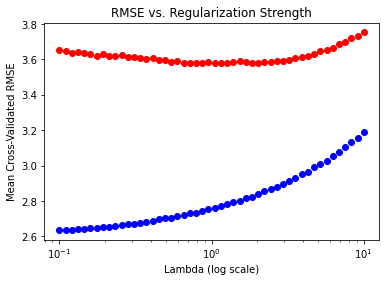

In [48]:
print(lmbdas)
# plotting
fig, ax = plt.subplots(1)
ax.scatter(lmbdas, mean_train, c = 'blue')
ax.scatter(lmbdas, mean_test, c = 'red')
plt.xlabel('True Value')
ax.set_xscale('log')
ax.set_xlabel('Lambda (log scale)')
ax.set_ylabel('Mean Cross-Validated RMSE')
ax.set_title('RMSE vs. Regularization Strength')
plt.show()

What value of lambda minimizes your cross-validated (test) RMSE? Fix that value of lambda, and train a new model using all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calcuate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 4.3, 4.2, 2.3, and to the RMSE from nearest neighbors? What do you make of these results?

In [49]:
minval = np.argmin(mean_test)
print(mean_test)
print(minval)
minlambda = lmbdas[minval]
print(minlambda)

[3.6506756425642597, 3.645008564272085, 3.6384866564923053, 3.639841422559659, 3.6350855264740636, 3.629851857574663, 3.620299271938399, 3.6287767055735713, 3.6182028647146116, 3.6165792515639703, 3.623273585546612, 3.6142014333487746, 3.614427142078098, 3.607469370416297, 3.6033965807340147, 3.606954895498968, 3.59611511445351, 3.5961014244698895, 3.587612823180593, 3.592319198593114, 3.5806369639698503, 3.5787942074353856, 3.5769442879708606, 3.5775980532961635, 3.5857597173956863, 3.580702449170745, 3.5769955497882227, 3.5769892570864377, 3.58500670054247, 3.5883919370368296, 3.58379277113, 3.578437904701202, 3.577886692579158, 3.5873768381600324, 3.586929098728261, 3.5894993515087883, 3.589742067422252, 3.5948471021851915, 3.60749998871727, 3.611760202839292, 3.6180901379512194, 3.627571503596237, 3.645078346462796, 3.653180714695336, 3.6653955105269054, 3.6842500539584893, 3.6988345193462293, 3.717969618068782, 3.731808121342249, 3.7521959424196347]
22
0.7906043210907697


In [53]:
a, b = reg_multivariate_ols(X_train, y_train, R=0.01, MaxIterations=100000, lam=minlambda)
predictions = model(a, b, X_test)
rmse_final = compute_rmse(predictions,y_test)
print(rmse_final)

Time taken: 1.47 seconds
Iteration number: 14087
4.346925334933998


How does your test RMSE compare to the RMSE from 4.3, 4.2, 3.2, and to the RMSE from nearest neighbors? What do you make of these results?

4.4 results: 4.346925334933998
4.3 results: Training RMSE: 2.791560637154338; Testing RMSE: 4.329249888142999
4.2 results: Training RMSE: 2.719573979435247; Testing RMSE: 4.3016431756475875
3.2 results: 6.153580529876927

Using cross validation and optimizing our lambda, we find that our final RMSE is 4.34. This is worse than our results from 4.3 and 4.2, which makes sense as these RMSEs were overfitted due to the absense of cross validation. Comparing our final RMSE of 4.34 to our 3.2 RMSE of 6.15, we can see that our model using all the variables established in 4.1 is a better model even with cross validation and penalizing for complexity. The graph demonstrates that as the penalty for complexity (lambda) increases, our RMSE will get higher.

###  Extra Credit 2: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in neural network training. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. Tune the algorithm until you estimate the regression coefficients within a tolerance of 1e-1. Use mini-batch gradient descent in this implementation. In summary for each parameter (in our case one intercept and three slopes) the update step of the gradient (in this example $\beta_j$) at iteration $k$ of the GD algorithm becomes:

$$\beta_j=\beta_j -\frac{R}{\sqrt{G^{(k)}_j}}\frac{\partial J(\alpha,\beta_1,\ldots)}{\partial \beta_j}$$ where
$G^{(k)}_j=\sum_{i=1}^{k} (\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j})^2$ and $R$ is your learning rate. The notation $\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j}$ corresponds to the value of the gradient at iteration $(i)$. Essentially we are "storing" information about previous iteration gradients. Doing that we effectively decrease the learning rate slower when a feature $x_i$ is sparse (i.e. has many zero values which would lead to zero gradients). Although this method is not necessary for our regression problem, it is good to be familiar with these methods as they are widely used in neural network training.  

In [38]:
# Your code here

*Discuss your results here*